In [1]:
%load_ext Cython

In [2]:
%%cython
a=1

# Machine Learning

*Екатерина Лобачева / Илья Щуров / Сергей Сметанин *

*Совместный бакалавриат НИУ ВШЭ и РЭШ, 2016-17 учебный год*

[Страница курса](http://math-info.hse.ru/2016-17/Machine_Learning)

## Домашнее задание №ML1
Задание основано на материалах курса [Data analysis (Software Engineering)](http://wiki.cs.hse.ru/Data_analysis_(Software_Engineering%29) (ФКН НИУ ВШЭ).

Вам необходимо анализировать набор данных [adult.data](http://archive.ics.uci.edu/ml/datasets/Adult) (источник: UCI Machine Learning Repository) с помощью Python, pandas, numpy, scipy.

Чтобы выполнить работу, скачайте настоящий ipynb-файл, откройте его в *Jupyter Notebook*, впишите решения в оставленные для этого ячейки (при необходимости можно добавлять новые ячейки), приводя полный работающий код, а также все необходимые пояснения и ответы (для этого нужно использовать markdown-ячейки). Вы можете вставлять формулы с помощью TeX-разметки в markdown-ячейки. После выполнения работы необходимо вытащить ipynb-файл из Jupyter (например, с помощью *File → Download as… → IPython Notebook*) и загрузить его на my.NES.

**Подсказка.** Файл [adult.data](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data) является CSV-файлом, но в нём отсутствуют имена переменных — они (вместе с описаниями) приводятся в отдельном файле [adult.names](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). При загрузке датафрейма с помощью `pd.read_csv` используйте параметры `header=None` (чтобы первая строка не воспринималась как строка с именами переменных) и `names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"]`.

### Вопрос 1
Сколько мужчин и женщин в выборке?

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
adult = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None, names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"])
Males = adult[adult['sex'] == ' Male'].shape[0]
Females = adult[adult['sex'] == ' Female'].shape[0]
print(Males, 'Males')
print(Females, 'Females')

21790 Males
10771 Females


### Вопрос 2
Каков средний возраст мужчин?


In [4]:
print(adult[adult['sex'] == ' Male']['age'].mean())

39.43354749885268


### Вопрос 3
Какова доля граждан США?

In [5]:
Americans = adult[adult['native-country'] == ' United-States'].shape[0]
print(Americans/(Males + Females))

0.895857006848684


### Вопрос 4
Нарисовать распределение уровня образования в виде столбчатой диаграммы (bar plot).

<AxesSubplot:>

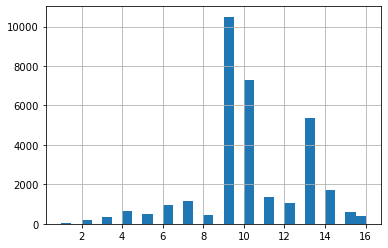

In [6]:
adult.rename(columns={'education-num': 'education_num'}, inplace=True)
adult.education_num.hist(bins = 30)

### Вопрос 5
Найти среднее и стандартное отклонение переменной "final weight" (fnlwgt) для разведённых людей?

In [7]:
Divorced = adult[adult['marital-status'] == ' Divorced']
DivNum =Divorced.shape[0]
s = 0
for i in range(DivNum):
    s += Divorced.iloc[i, 2]
AvgWgt = s/DivNum
print(AvgWgt, 'Average final weight')
s = 0
for i in range(DivNum):
    s += (Divorced.iloc[i, 2] -AvgWgt) ** 2
print((s/DivNum) ** (0.5), 'Standard deviation')

185802.79045689848 Average final weight
105634.89966249917 Standard deviation


### Вопрос 6
Правда ли, что люди, зарабатывающие более 50 тыс. в основном имеют высшее образование?

In [8]:
HighInc = adult[adult['50K'] == ' >50K']
s=0
for i in range(HighInc.shape[0]):
    if ((HighInc.iloc[i, 3] == ' Some-college') or (HighInc.iloc[i, 3] == ' Bachelors') or (HighInc.iloc[i, 3] == ' Masters') or (HighInc.iloc[i, 3] == ' Doctorate')):
        s += 1
print(s/HighInc.shape[0])
if(s/HighInc.shape[0] > 0.5):
  print('It is true')
else:
  print('It is not true')

0.6214768524422906
It is true


### Вопрос 7
Каков максимальный возраст мужчин и женщин каждой расы?

In [9]:
adultM = adult[adult['sex'] == ' Male']
adultF = adult[adult['sex'] == ' Female']
print('Males max age'+ '\n',  adultM.groupby('race')['age'].max())
print('\n' + "Females max age" + '\n', adultF.groupby('race')['age'].max())

Males max age
 race
 Amer-Indian-Eskimo    82
 Asian-Pac-Islander    90
 Black                 90
 Other                 77
 White                 90
Name: age, dtype: int64

Females max age
 race
 Amer-Indian-Eskimo    80
 Asian-Pac-Islander    75
 Black                 90
 Other                 74
 White                 90
Name: age, dtype: int64


### Вопрос 8
Люди из каких стран работают как фермеры/рыбаки?

In [10]:
FarmFish = adult[adult['occupation'] == ' Farming-fishing']
FarmFish.groupby('native-country')['age'].mean()

native-country
 ?                33.200000
 Cambodia         42.000000
 Canada           57.500000
 Cuba             41.000000
 El-Salvador      31.000000
 England          33.000000
 France           64.000000
 Germany          62.000000
 Guatemala        37.750000
 Hong             19.000000
 Ireland          31.000000
 Italy            45.500000
 Japan            44.000000
 Mexico           33.415584
 Philippines      48.500000
 Poland           23.000000
 Portugal         38.000000
 Puerto-Rico      30.200000
 United-States    41.916951
 Vietnam          71.500000
 Yugoslavia       35.000000
Name: age, dtype: float64

### Вопрос 9
Рассмотрим два отношения 1) количество мужчин-бакалавров к количеству мужчин-магистров и 2) количество женщин-бакалавров к количеству женщин-магистров. Какое отношение больше?


In [11]:
ratioM = adultM[adultM['education'] == ' Bachelors'].shape[0]/adultM[adultM['education'] == ' Masters'].shape[0]
ratioF = adultF[adultF['education'] == ' Bachelors'].shape[0]/adultF[adultF['education'] == ' Masters'].shape[0]
if ratioM > ratioF:
    print('Male ratio is higher')
else:
    print('Female ratio is higher')

Male ratio is higher


### Вопрос 10
Каково максимальное количество рабочих часов в неделю? Как много людей работают столько часов в неделю? Каков их заработок?

In [12]:
MaxH = adult['hours-per-week'].max()
NumMaxH = adult[adult['hours-per-week'] == MaxH].shape[0]
adultMaxH = adult[adult['hours-per-week'] == MaxH]
More50KMaxH = adultMaxH[adultMaxH['50K'] == ' >50K'].shape[0]
print(MaxH, 'Hours per week','\n', NumMaxH, 'People', '\n', More50KMaxH, 'more than 50K and', NumMaxH - More50KMaxH, 'less than 50K')

99 Hours per week 
 85 People 
 25 more than 50K and 60 less than 50K
